# EDA (Exploratory Data Analysis)

In [11]:
# Importar librerías

import pandas as pd
from summarytools import dfSummary
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
## Cargamos los archivos limpios

df_h=pd.read_excel('./dataset/hechos.xlsx')
df_v=pd.read_excel('./dataset/victimas.xlsx')

In [3]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_HECHO          696 non-null    object        
 1   N_VICTIMAS        696 non-null    int64         
 2   FECHA             696 non-null    datetime64[ns]
 3   HORA              695 non-null    float64       
 4   TIPO_DE_CALLE     696 non-null    object        
 5   COMUNA            694 non-null    float64       
 6   XY (CABA)         682 non-null    object        
 7   LONGITUD          684 non-null    float64       
 8   LATITUD           684 non-null    float64       
 9   VEHICULO_VICTIMA  687 non-null    object        
 10  VEHICULO_ACUSADO  673 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 59.9+ KB


In [4]:
df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_HECHO          717 non-null    object        
 1   FECHA             717 non-null    datetime64[ns]
 2   ROL_VICTIMA       706 non-null    object        
 3   VEHICULO_VICTIMA  708 non-null    object        
 4   SEXO_VICTIMA      711 non-null    object        
 5   EDAD_VICTIMA      664 non-null    float64       
 6   RANGO_ETARIO      664 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 39.3+ KB


Al ver que no se cambió el tipo, lo cambiamos ahora.

In [19]:
#Para la tabla HECHOS

#Cambiamos el tipo de algunas dimensiones(columnas) a Categóricos
df_h['TIPO_DE_CALLE'] = df_h['TIPO_DE_CALLE'].astype('category')
df_h['COMUNA'] = df_h['COMUNA'].astype('category')
df_h['VEHICULO_VICTIMA'] = df_h['VEHICULO_VICTIMA'].astype('category')
df_h['VEHICULO_ACUSADO'] = df_h['VEHICULO_ACUSADO'].astype('category')

#Cambiamos el tipo de algunas dimensiones(columnas) a int
df_h['HORA'] = df_h['HORA'].fillna(0).astype('int64')

#Cambiamos el tipo de la fecha
df_h['FECHA'] = df_h['FECHA'].astype('datetime64[ns]')
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_HECHO          696 non-null    object        
 1   N_VICTIMAS        696 non-null    int64         
 2   FECHA             696 non-null    datetime64[ns]
 3   HORA              696 non-null    int64         
 4   TIPO_DE_CALLE     696 non-null    category      
 5   COMUNA            694 non-null    category      
 6   XY (CABA)         682 non-null    object        
 7   LONGITUD          684 non-null    float64       
 8   LATITUD           684 non-null    float64       
 9   VEHICULO_VICTIMA  687 non-null    category      
 10  VEHICULO_ACUSADO  673 non-null    category      
dtypes: category(4), datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 42.4+ KB


In [20]:
#Para la tabla VICTIMAS

#Cambiamos el tipo de algunas dimensiones(columnas) a Categóricos
df_v['ROL_VICTIMA'] = df_v['ROL_VICTIMA'].astype('category')
df_v['VEHICULO_VICTIMA'] = df_v['VEHICULO_VICTIMA'].astype('category')
df_v['SEXO_VICTIMA'] = df_v['SEXO_VICTIMA'].astype('category')
df_v['RANGO_ETARIO'] = df_v['RANGO_ETARIO'].astype('category')


#Cambiamos el tipo de la fecha
df_h['FECHA'] = df_h['FECHA'].astype('datetime64[ns]')

**ENTENDER LAS VARIABLES**

**Tabla de "HECHOS"**

In [21]:
#Visualizamos las primeras filas
df_h.head()

,ID_HECHO,N_VICTIMAS,FECHA,HORA,TIPO_DE_CALLE,COMUNA,XY (CABA),LONGITUD,LATITUD,VEHICULO_VICTIMA,VEHICULO_ACUSADO
0,2016-0001,1,2016-01-01,4,AVENIDA,8.0,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO,AUTO
1,2016-0002,1,2016-01-02,1,AVENIDA,9.0,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,7,AVENIDA,1.0,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO,AUTO
3,2016-0004,1,2016-01-10,0,AVENIDA,8.0,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO,NaN
4,2016-0005,1,2016-01-21,5,AVENIDA,1.0,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO,PASAJEROS


In [22]:
#Visualizamos las últimas filas
df_h.tail()

,ID_HECHO,N_VICTIMAS,FECHA,HORA,TIPO_DE_CALLE,COMUNA,XY (CABA),LONGITUD,LATITUD,VEHICULO_VICTIMA,VEHICULO_ACUSADO
691,2021-0093,1,2021-12-13,17,AVENIDA,7.0,Point (102728.60090138 98186.24929177),-58.433538,-34.645616,MOTO,AUTO
692,2021-0094,1,2021-12-20,1,AUTOPISTA,9.0,Point (99624.29795829 97569.69801131),-58.467398,-34.651178,MOTO,AUTO
693,2021-0095,1,2021-12-30,0,AVENIDA,11.0,Point (99116.45492358 101045.23284826),-58.472934,-34.619847,MOTO,CARGAS
694,2021-0096,1,2021-12-15,10,AVENIDA,9.0,Point (99324.54463985 97676.26932409),-58.470668,-34.650217,AUTO,CARGAS
695,2021-0097,1,2021-11-18,6,CALLE,1.0,Point (107664.16647795 104708.63962087),-58.379762,-34.586796,BICICLETA,AUTO


In [23]:
df_h.describe()

,N_VICTIMAS,FECHA,HORA,LONGITUD,LATITUD
count,696.000000,696,696.000000,684.000000,684.000000
mean,1.030172,2018-09-14 05:12:24.827586048,11.640805,-58.441545,-34.619632
min,1.000000,2016-01-01 00:00:00,0.000000,-58.529942,-34.705250
25%,1.000000,2017-04-02 12:00:00,6.000000,-58.476218,-34.643689
50%,1.000000,2018-07-12 12:00:00,11.000000,-58.444513,-34.622928
75%,1.000000,2020-01-04 06:00:00,17.250000,-58.401841,-34.596799
max,3.000000,2021-12-30 00:00:00,23.000000,-58.356082,-34.534654
std,0.179393,NaN,6.709834,0.046144,0.035289


Analizamos valores NULOS

In [25]:
df_h.isnull().sum()

ID_HECHO             0
N_VICTIMAS           0
FECHA                0
HORA                 0
TIPO_DE_CALLE        0
COMUNA               2
XY (CABA)           14
LONGITUD            12
LATITUD             12
VEHICULO_VICTIMA     9
VEHICULO_ACUSADO    23
dtype: int64

Analizamos valores DUPLICADOS

In [33]:
print('ID_HECHO:',df_h['ID_HECHO'].duplicated().sum())
print('N_VICTIMAS:',df_h['N_VICTIMAS'].duplicated().sum())
print('FECHA:',df_h['FECHA'].duplicated().sum())
print('HORA:',df_h['HORA'].duplicated().sum())
print('TIPO_DE_CALLE:',df_h['TIPO_DE_CALLE'].duplicated().sum())
print('COMUNA:',df_h['COMUNA'].duplicated().sum())
print('XY (CABA):',df_h['XY (CABA)'].duplicated().sum())
print('LONGITUD:',df_h['LONGITUD'].duplicated().sum())
print('LATITUD:',df_h['LATITUD'].duplicated().sum())
print('VEHICULO_VICTIMA:',df_h['VEHICULO_VICTIMA'].duplicated().sum())
print('VEHICULO_ACUSADO:',df_h['VEHICULO_ACUSADO'].duplicated().sum())

ID_HECHO: 0
N_VICTIMAS: 693
FECHA: 98
HORA: 672
TIPO_DE_CALLE: 693
COMUNA: 680
XY (CABA): 90
LONGITUD: 91
LATITUD: 91
VEHICULO_VICTIMA: 686
VEHICULO_ACUSADO: 686


Conclusión

**Tabla de "VICTIMAS"**

In [35]:
#Visualizamos las primeras filas
df_v.head()

,ID_HECHO,FECHA,ROL_VICTIMA,VEHICULO_VICTIMA,SEXO_VICTIMA,EDAD_VICTIMA,RANGO_ETARIO
0,2016-0001,2016-01-01,CONDUCTOR,MOTO,MASCULINO,19.0,2) 18 a 29 años
1,2016-0002,2016-01-02,CONDUCTOR,AUTO,MASCULINO,70.0,6) 60 años o mas
2,2016-0003,2016-01-03,CONDUCTOR,MOTO,MASCULINO,30.0,3) 30 a 39 años
3,2016-0004,2016-01-10,CONDUCTOR,MOTO,MASCULINO,18.0,2) 18 a 29 años
4,2016-0005,2016-01-21,CONDUCTOR,MOTO,MASCULINO,29.0,2) 18 a 29 años


In [36]:
#Visualizamos las últimas filas
df_v.tail()

,ID_HECHO,FECHA,ROL_VICTIMA,VEHICULO_VICTIMA,SEXO_VICTIMA,EDAD_VICTIMA,RANGO_ETARIO
712,2021-0092,2021-12-12,PEATON,PEATON,FEMENINO,50.0,5) 50 a 59 años
713,2021-0093,2021-12-13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18.0,2) 18 a 29 años
714,2021-0094,2021-12-20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43.0,4) 45 a 49 años
715,2021-0095,2021-12-30,CONDUCTOR,MOTO,MASCULINO,27.0,2) 18 a 29 años
716,2021-0096,2021-12-15,CONDUCTOR,AUTO,MASCULINO,60.0,6) 60 años o mas


In [37]:
df_v.describe()

,FECHA,EDAD_VICTIMA
count,717,664.000000
mean,2018-09-09 01:36:24.100418304,42.167169
min,2016-01-01 00:00:00,1.000000
25%,2017-04-01 00:00:00,27.000000
50%,2018-07-07 00:00:00,37.000000
75%,2019-12-18 00:00:00,56.250000
max,2021-12-30 00:00:00,95.000000
std,NaN,19.788034


Analizamos valores NULOS

In [38]:
df_v.isnull().sum()

ID_HECHO             0
FECHA                0
ROL_VICTIMA         11
VEHICULO_VICTIMA     9
SEXO_VICTIMA         6
EDAD_VICTIMA        53
RANGO_ETARIO        53
dtype: int64

Analizamos valores DUPLICADOS

In [39]:
print('ID_HECHO:',df_v['ID_HECHO'].duplicated().sum())
print('FECHA:',df_v['FECHA'].duplicated().sum())
print('ROL_VICTIMA:',df_v['ROL_VICTIMA'].duplicated().sum())
print('VEHICULO_VICTIMA:',df_v['VEHICULO_VICTIMA'].duplicated().sum())
print('SEXO_VICTIMA:',df_v['SEXO_VICTIMA'].duplicated().sum())
print('EDAD_VICTIMA:',df_v['EDAD_VICTIMA'].duplicated().sum())
print('RANGO_ETARIO:',df_v['RANGO_ETARIO'].duplicated().sum())

ID_HECHO: 21
FECHA: 119
ROL_VICTIMA: 712
VEHICULO_VICTIMA: 709
SEXO_VICTIMA: 714
EDAD_VICTIMA: 631
RANGO_ETARIO: 710


Conclusión

**OUTLIERS**

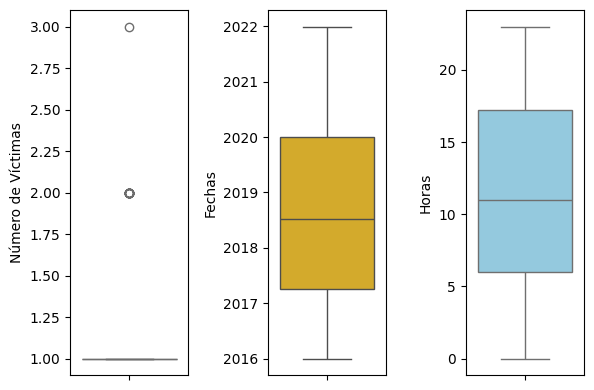

In [51]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 4))

# Crear subplots para los gráficos 
plt.subplot(1, 5, 1) 
sns.boxplot(data=df_h, y='N_VICTIMAS', color = "#FA8072")
plt.ylabel('Número de Víctimas')

plt.subplot(1, 5, 2) 
sns.boxplot(data=df_h, y='FECHA', color = "#EFB810")
plt.ylabel('Fechas')

plt.subplot(1, 5, 3) 
sns.boxplot(data=df_h, y='HORA', color = "#87CEEB")
plt.ylabel('Horas')

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()


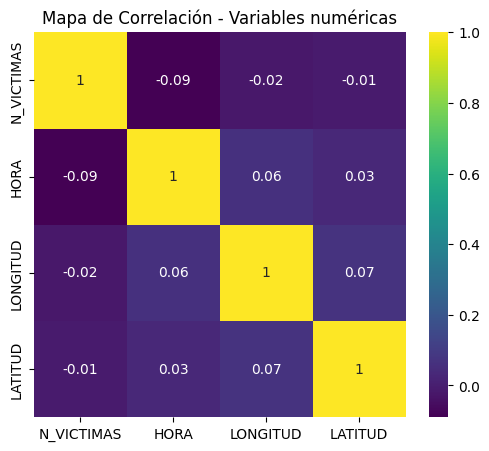

In [52]:
# Generamos un mapa de calor con las correlaciones de los todos los datos que contengan números 
dataNumerica = df_h.select_dtypes(include=['number']) 
corr = dataNumerica.corr().round(2)

plt.figure(figsize=(6,5))
sns.heatmap(corr, cmap="viridis", annot=True)
plt.title('Mapa de Correlación - Variables numéricas')
plt.show()

C:\Users\Rafael Farfan\AppData\Local\Temp\ipykernel_19108\4141307061.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_filtrado, x='N_VICTIMAS', palette="Paired")


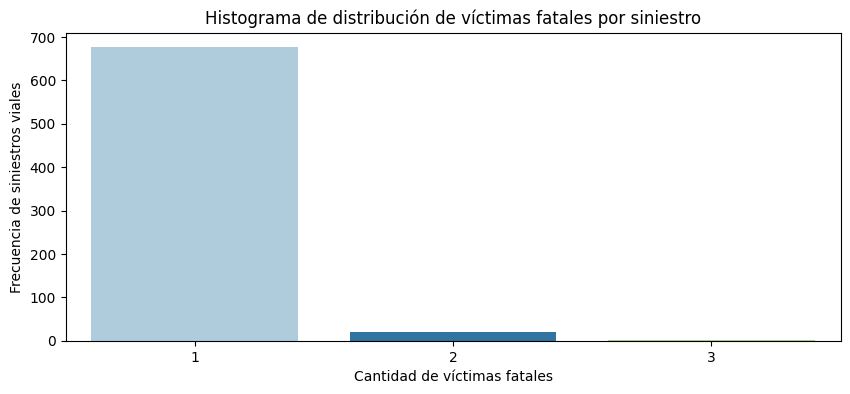

In [54]:
plt.figure(figsize=(10, 4))
# se filtran los valores sin datos o nulos 
df_filtrado = df_h[df_h["N_VICTIMAS"] != 0]

#Se cuentan los datos de la columna y se calcula la frecuencia en que se distribuye
sns.countplot(df_filtrado, x='N_VICTIMAS', palette="Paired")

plt.ylabel("Frecuencia de siniestros viales")
plt.xlabel("Cantidad de víctimas fatales")
plt.title("Histograma de distribución de víctimas fatales por siniestro")

plt.show()

COMUNAS

In [9]:
#Inicializamos CRS

crs={'init':'epsg:4326'}

In [12]:

#Definimos la geometría según nuestro dataset
geometry=[Point(xy) for xy in zip(df_h['LONGITUD'], df_h['LATITUD'])]

c:\Users\Rafael Farfan\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

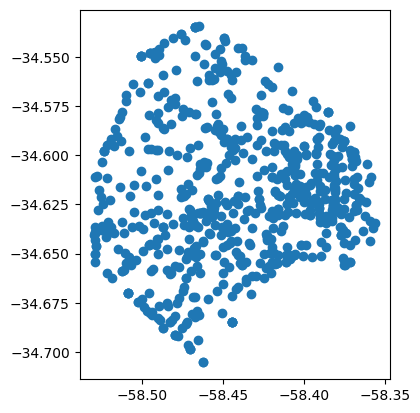

In [13]:
#Ua vez que tenemos el sistema de referencia decoordenadas y la geometría; se procede a la carga de los datos
geodata=gpd.GeoDataFrame(df_h,crs=crs, geometry=geometry)

#Se imprime el resultante que luego será introducido en un mapa
geodata.plot()

In [ ]:
comunas = gpd.read_file(r'./dataset/comunas.zip')
comunas

<Axes: >

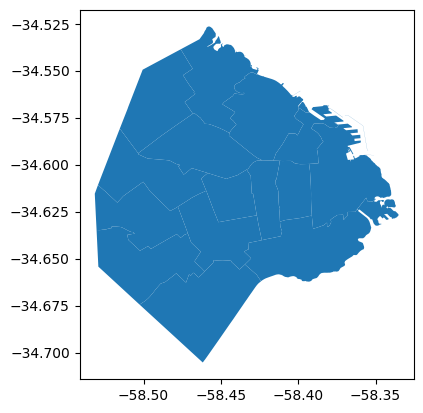

In [8]:
comunas.plot()

Conclusión

VARIABLES CATEGÓRICAS